# Hair Loss Prediction
## Tanner Wheeler
## A01770306
## CS 6850

### Imported Libraries

In [302]:
import numpy as np
import pandas as pd
from pandas import crosstab
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

#### Reading the Data

In [233]:
data = pd.read_csv("PredictHairFall.csv")
data["Hair Loss"] = data["Hair Loss"].astype(bool)
classification_counts = data["Hair Loss"].value_counts()

In [234]:
classification_counts

Hair Loss
False    502
True     497
Name: count, dtype: int64

#### Checking for any Null or NaN values in the Data Frame

In [235]:
data.isnull().any().any()

False

#### Checking for duplicate Ids

In [236]:
duplicates = data[data["Id"].duplicated(keep=False)]

In [237]:
duplicates

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
118,172639,Yes,Yes,Androgenetic Alopecia,Heart Medication,Iron deficiency,Moderate,29,Yes,No,Yes,No,True
237,157627,Yes,No,Dermatosis,Rogaine,Protein deficiency,Moderate,47,Yes,No,Yes,Yes,True
388,110171,Yes,No,Thyroid Problems,Antifungal Cream,Selenium deficiency,Low,25,Yes,No,Yes,Yes,False
408,110171,No,No,Psoriasis,Immunomodulators,Vitamin E deficiency,Low,41,Yes,No,No,Yes,False
600,157627,No,No,Thyroid Problems,Accutane,Protein deficiency,Moderate,44,Yes,Yes,Yes,Yes,False
669,186979,No,No,Seborrheic Dermatitis,Blood Pressure Medication,Vitamin E deficiency,Moderate,41,No,No,No,No,True
866,172639,Yes,Yes,No Data,Accutane,Vitamin A Deficiency,Low,47,Yes,No,No,Yes,False
956,186979,Yes,Yes,Seborrheic Dermatitis,Chemotherapy,No Data,Moderate,21,No,No,Yes,No,True


In [238]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,999.0,NaN,NaN,NaN,153354.673674,25516.041985,110003.0,131867.5,152951.0,174969.0,199949.0
Genetics,999,2,Yes,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Changes,999,2,Yes,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Conditions,999,11,No Data,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medications & Treatments,999,11,Rogaine,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nutritional Deficiencies,999,11,Zinc Deficiency,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stress,999,3,Moderate,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,999.0,NaN,NaN,NaN,34.188188,9.37798,18.0,26.0,34.0,42.0,50.0
Poor Hair Care Habits,999,2,No,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Environmental Factors,999,2,Yes,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot the different values

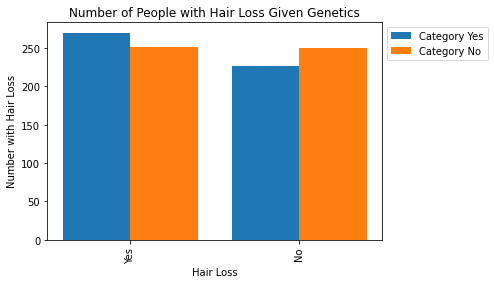

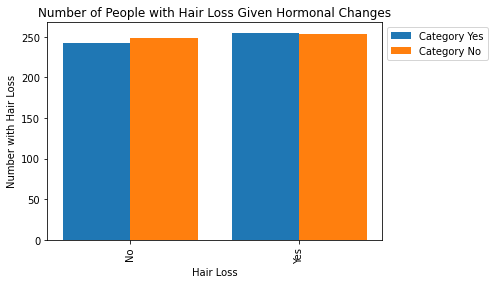

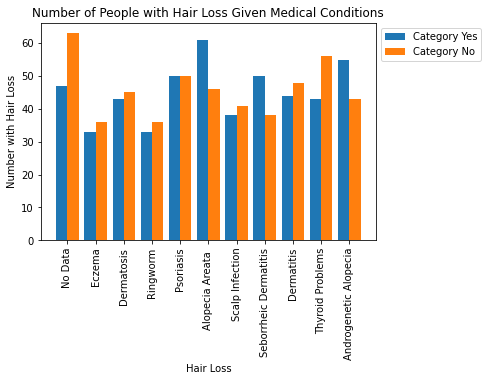

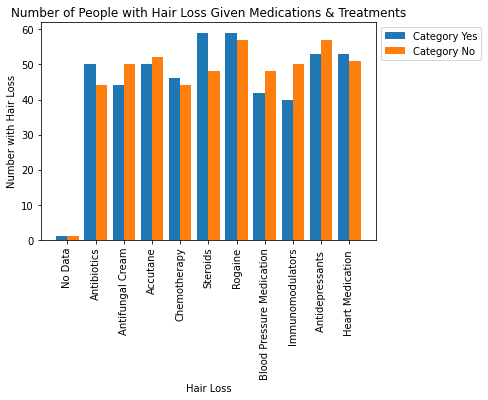

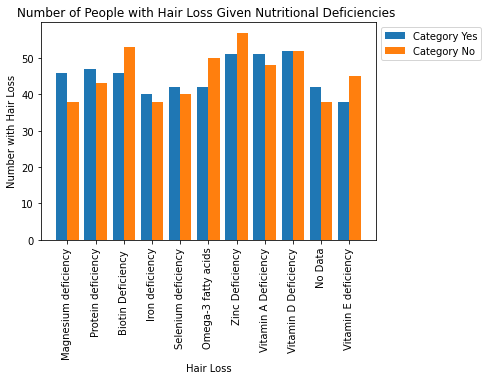

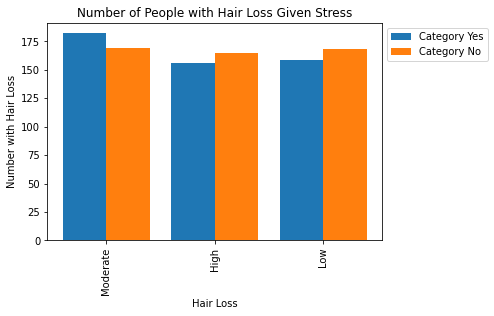

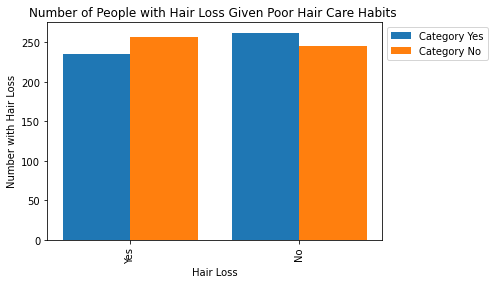

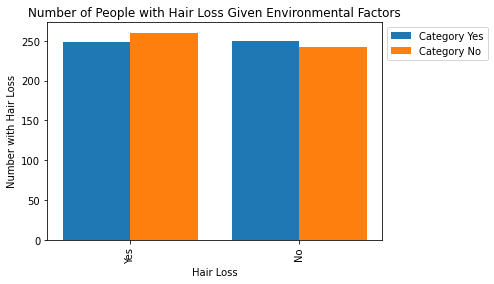

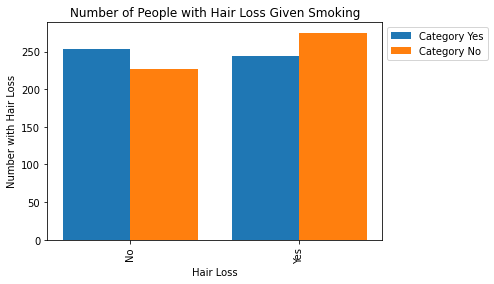

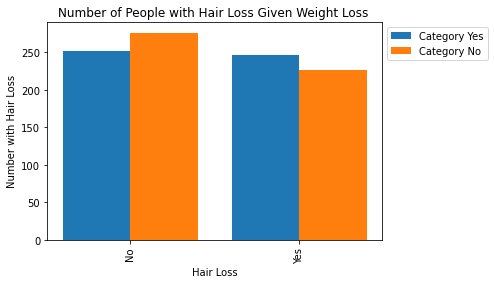

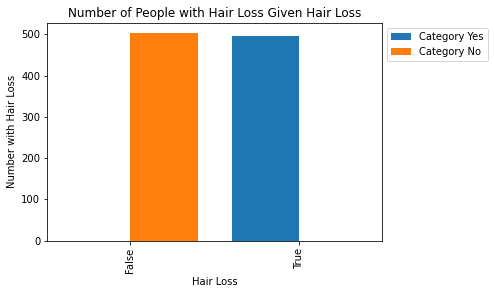

In [239]:
keys = [i for i in data.keys()]
keys.pop(0)
keys.pop(6)

for cat in keys:
    X = data[cat].unique()
    yes_list = []
    no_list = []
    for a in data[cat].unique():
        temp = data[data[cat] == a]
        yes_list.append(len(temp[temp['Hair Loss'] == True]))
        no_list.append(len(temp[temp['Hair Loss'] == False]))

    X_axis = np.arange(len(X))
    
    plt.bar(X_axis - 0.2, yes_list, 0.4, label='Category Yes')
    plt.bar(X_axis + 0.2, no_list, 0.4, label='Category No')
    
    plt.xticks(X_axis, X, rotation=90)
    plt.xlabel("Hair Loss")
    plt.ylabel("Number with Hair Loss")
    plt.title("Number of People with Hair Loss Given " + str(cat))
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

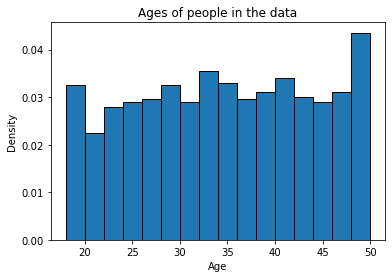

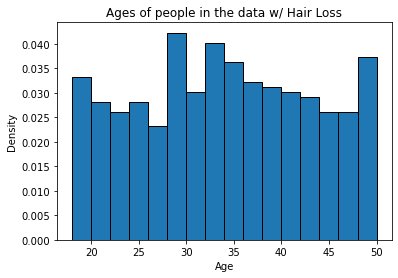

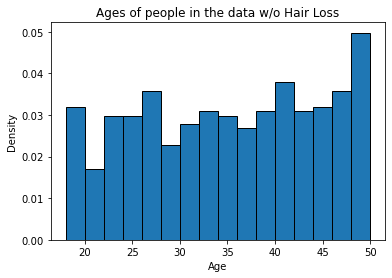

In [240]:
values = data['Age']
plt.hist(values, bins=range(18, 52, 2), edgecolor="black", density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Ages of people in the data")
plt.show()

values = data[data['Hair Loss'] == True]['Age']
plt.hist(values, bins=range(18, 52, 2), edgecolor="black", density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Ages of people in the data w/ Hair Loss")
plt.show()

values = data[data['Hair Loss'] == False]['Age']
plt.hist(values, bins=range(18, 52, 2), edgecolor="black", density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Ages of people in the data w/o Hair Loss")
plt.show()

In [241]:
xs = [i for i in data.keys()]
xs.pop(0)

#print(xs)

for x in range(len(xs)):
    for y in range(x,len(xs)):
        if xs[x] != xs[y] and xs[x] != "Id" and xs[y] != "Id" and xs[x] != "Age" and xs[y] != "Age" and xs[x] != "Hair Loss" and xs[y] != "Hair Loss":
            data2 = data[[xs[x],xs[y]]]
            freq = crosstab(data2[xs[x]], data2[xs[y]])
            #print(freq)
            #print()
            total = freq.sum().sum()
            Pxy = round(freq/total,2)
            #print(Pxy)
            #print()
            Px = freq.sum(axis=1)/total
            Px = pd.DataFrame([Px for i in range(len(data2[xs[y]].unique()))], index=Pxy.columns).transpose()
            Py = freq.sum(axis=0)/total
            Py = pd.DataFrame([Py for i in range(len(data2[xs[x]].unique()))], index=Pxy.index).transpose()
            temp = Pxy/Px
            temp = temp/Py
            temp = Pxy*np.log(temp)/np.log(2)
            print("Mutual Information between " + xs[x] + " and " + xs[y] + ":", temp.sum().sum())

Mutual Information between Genetics and Hormonal Changes: -0.00021701119930679462
Mutual Information between Genetics and Medical Conditions: 0.0
Mutual Information between Genetics and Medications & Treatments: 0.0
Mutual Information between Genetics and Nutritional Deficiencies : 0.0
Mutual Information between Genetics and Stress: 0.0
Mutual Information between Genetics and Poor Hair Care Habits : 0.0016026095470909694
Mutual Information between Genetics and Environmental Factors: -0.00019977790747967641
Mutual Information between Genetics and Smoking: 0.0012718803231969167
Mutual Information between Genetics and Weight Loss : 0.02252731821249435
Mutual Information between Hormonal Changes and Medical Conditions: 0.0
Mutual Information between Hormonal Changes and Medications & Treatments: 0.0
Mutual Information between Hormonal Changes and Nutritional Deficiencies : 0.0
Mutual Information between Hormonal Changes and Stress: 0.0
Mutual Information between Hormonal Changes and Poor H

/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


#### Decision Trees

In [242]:
results = data['Hair Loss']
data = data.drop(columns=['Id', 'Hair Loss'])

Finding the best Tree Depth and Test Set size

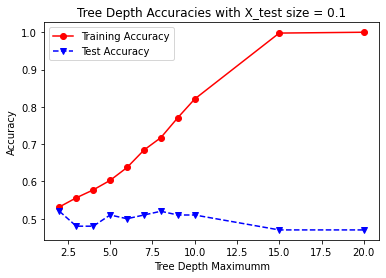

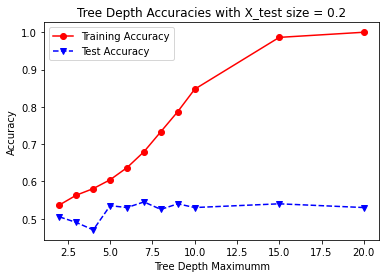

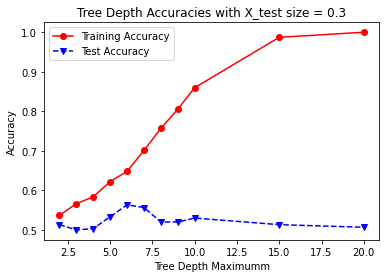

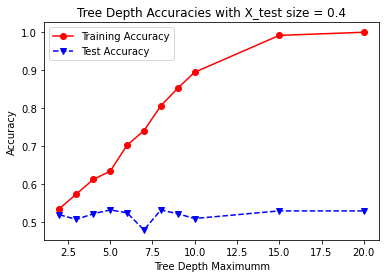

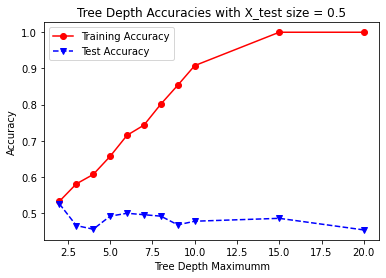

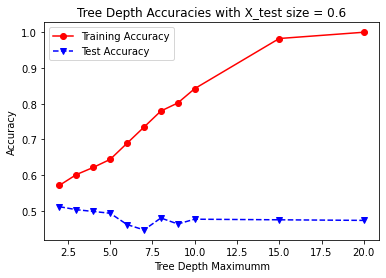

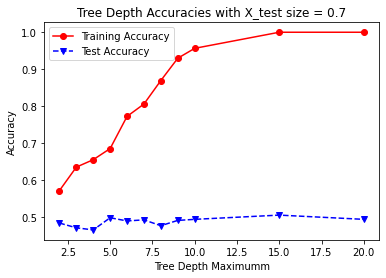

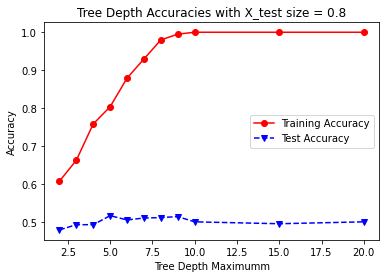

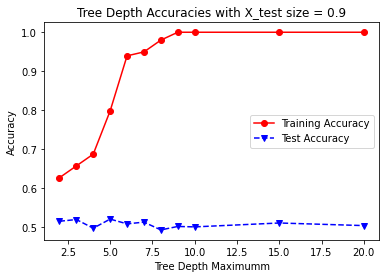

In [285]:
for i in range(1, 10):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    maxdepths = [2,3,4,5,6,7,8,9,10,15,20]
    
    trainAcc = np.zeros(len(maxdepths))
    testAcc = np.zeros(len(maxdepths))
    index = 0
    
    for depth in maxdepths:
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Tree Depth Maximumm')
    plt.ylabel('Accuracy')
    plt.title('Tree Depth Accuracies with X_test size = ' + str(i/10))
    plt.show()

5-Fold Cross Validation with Decision Tree

In [301]:
df = data
r = results

le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

clf = tree.DecisionTreeClassifier(max_depth=6)
scores = cross_val_score(clf, df, r, cv=5)
data

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss
0,1,0,5,8,2,2,19,1,1,0,0
1,0,0,4,1,2,0,43,1,1,0,0
2,0,0,3,3,5,2,26,1,1,0,1
3,1,1,7,1,0,2,46,1,1,0,0
4,0,0,6,0,1,2,30,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,9,9,7,1,33,1,1,1,1
995,1,1,5,0,5,1,47,0,0,0,1
996,0,1,1,2,5,2,20,1,0,1,1
997,0,1,2,7,0,2,32,1,1,1,1


In [299]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.51 (+/- 0.06)


#### Random Forest Classifier

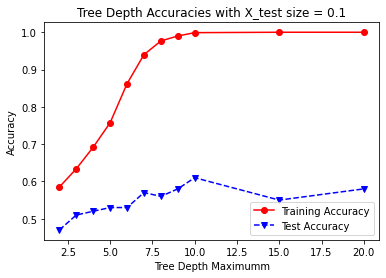

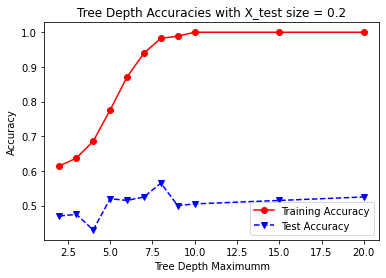

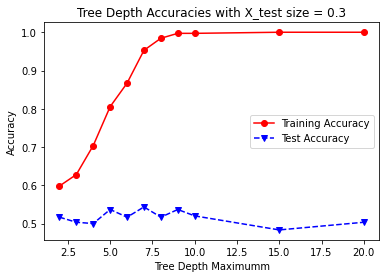

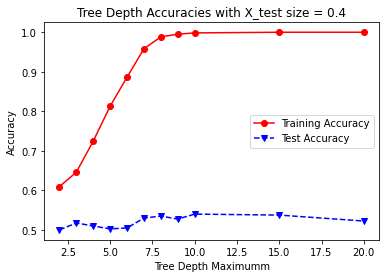

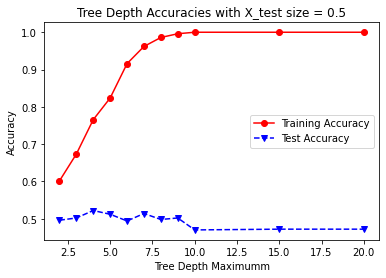

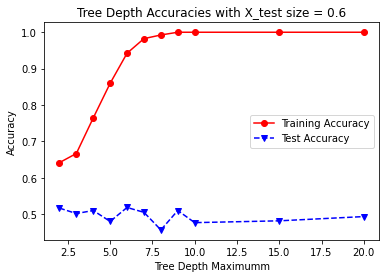

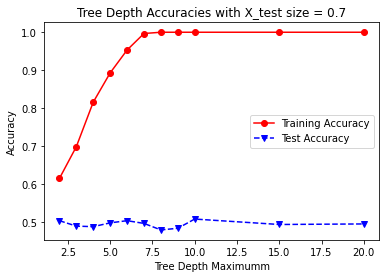

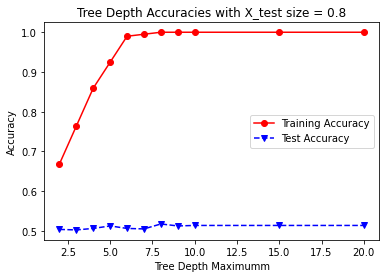

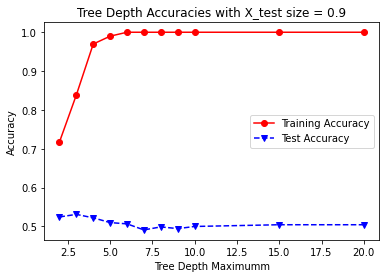

In [305]:
for i in range(1, 10):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    maxdepths = [2,3,4,5,6,7,8,9,10,15,20]
    
    trainAcc = np.zeros(len(maxdepths))
    testAcc = np.zeros(len(maxdepths))
    index = 0
    
    for depth in maxdepths:
        # Using a Random State for consistancy in initial testing
        clf = RandomForestClassifier(max_depth=depth, random_state=0)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Tree Depth Maximumm')
    plt.ylabel('Accuracy')
    plt.title('Tree Depth Accuracies with X_test size = ' + str(i/10))
    plt.show()

5-Fold Cross Validation with Random Forests

In [310]:
df = data
r = results

clf = RandomForestClassifier(max_depth=7, random_state=0)
scores = cross_val_score(clf, df, r, cv=5)

In [311]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.51 (+/- 0.03)
